In [1]:
import pandas as pd
import numpy as np
import copy
import os
from tqdm import tqdm

In [31]:
import matplotlib.pyplot as plt

In [2]:
benchmark_directory = "/projects/mcmm/benchmark_2023-05-13/"

In [3]:
def extract_func_info_from_np_filename(np_fname):
    splitted = np_fname.lower().split("_")
    func = splitted[0]
    dim = int(splitted[1][:-1])
    info = {
        "function": func,
        "dimension": dim,
    }
    return info

In [4]:
def extract_obj_list_from_np_file(np_fpath):
    data = np.load(np_fpath)
    obj_list = data[:, 0].tolist()
    return obj_list

In [5]:
def populate_results_for_data_dir(data_dir_path):
    files = [fn for fn in os.listdir(data_dir_path) if fn.endswith('.npy')]

    results = []

    for file in tqdm(files):
        info = extract_func_info_from_np_filename(file)
        obj_list = extract_obj_list_from_np_file(os.path.join(data_dir_path, file))
        result_dict = copy.copy(info)
        result_dict['obj_list'] = obj_list
        result_dict['algorithm'] = "mcmm"

        results.append(result_dict)
    
    return results

In [6]:
data_dirs = [
    "Ackley_May12",
    "Levy_May12",
    "Michalewicz_May12",
    "nlp"
]

In [7]:
all_mcmm_results = []
for data_dir in data_dirs:
    data_path = os.path.join(benchmark_directory, data_dir)
    print("Processing {}".format(data_path))
    results = populate_results_for_data_dir(data_path)
    
    all_mcmm_results += results

Processing /projects/mcmm/benchmark_2023-05-13/Ackley_May12


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:17<00:00,  1.13it/s]


Processing /projects/mcmm/benchmark_2023-05-13/Levy_May12


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.12s/it]


Processing /projects/mcmm/benchmark_2023-05-13/Michalewicz_May12


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:06<00:00,  3.81it/s]


Processing /projects/mcmm/benchmark_2023-05-13/nlp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.93it/s]


In [8]:
pd.DataFrame(all_mcmm_results)

,function,dimension,obj_list,algorithm
0,ackley,50,"[21.42574691772461, 21.42574691772461, 21.4257...",mcmm
1,ackley,50,"[21.189678192138672, 21.189678192138672, 21.18...",mcmm
2,ackley,200,"[21.26700210571289, 21.26700210571289, 21.2670...",mcmm
3,ackley,200,"[21.298858642578125, 21.298858642578125, 21.29...",mcmm
4,ackley,200,"[21.262550354003906, 21.262550354003906, 21.26...",mcmm
...,...,...,...,...
67,harkerp,101,"[13735989.0, 13735989.0, 13735989.0, 248121.71...",mcmm
68,biggsbi1,1001,"[146.75015258789062, 146.75015258789062, 146.7...",mcmm
69,vardim,101,"[970781888.0, 970781888.0, 970781888.0, 426712...",mcmm
70,watson,32,"[526058.3774878411, 526058.3774878411, 526058....",mcmm


In [9]:
def extract_func_info_from_np_filename_baseline(np_fname):
    splitted = np_fname.lower().split("_")
    func = splitted[0]
    dim = int(splitted[1])
    
    algorithm = None
    if "basinhopping" in np_fname:
        algorithm = "basinhopping"
    elif "differential_evolution" in np_fname:
        algorithm = "differential_evolution"
    elif "direct" in np_fname:
        algorithm = "direct"
    elif "dual_annealing" in np_fname:
        algorithm = "dual_annealing"
    elif "shgo" in np_fname:
        algorithm = "shgo"
    
    assert algorithm is not None, "Cannot extract algorithm from {}".format(np_fname)
    
    info = {
        "function": func,
        "dimension": dim,
        "algorithm": algorithm
    }
    return info

In [10]:
def extract_obj_list_from_np_file_baseline(np_fpath):
    data = np.load(np_fpath)
    obj_list = data
    return obj_list

In [11]:
def populate_results_for_data_dir_baseline(data_dir_path):
    files = [fn for fn in os.listdir(data_dir_path) if fn.endswith('.npy') and fn.strip(".npy").split('_')[-1] == 'Y']

    results = []

    for file in tqdm(files):
        info = extract_func_info_from_np_filename_baseline(file)
        obj_list = extract_obj_list_from_np_file_baseline(os.path.join(data_dir_path, file))
        result_dict = copy.copy(info)
        result_dict['obj_list'] = obj_list

        results.append(result_dict)
    
    return results

In [12]:
baseline_benchmark_directory = "/projects/mcmm/baselines_nlp/record"
baseline_results = populate_results_for_data_dir_baseline(baseline_benchmark_directory)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 898.66it/s]


In [13]:
pd.DataFrame(baseline_results)

,function,dimension,algorithm,obj_list
0,biggsbi1,1001,differential_evolution,"[134.02272, 140.04063, 138.50624, 136.41435, 1..."
1,watson,32,direct,"[528043.0017411856, 528043.0017411856, 528043...."
2,harkerp,101,dual_annealing,"[13893692.46111104, 14070743.084416322, 114301..."
3,watson,32,shgo,[]
4,watson,32,direct,"[528043.0017411856, 528043.0017411856, 528043...."
...,...,...,...,...
58,harkerp,101,direct,"[12847306.464999955, 12847306.464999955, 12847..."
59,watson,32,dual_annealing,"[145301792.91362187, 4865688.83437656, 701096...."
60,harkerp,101,direct,"[12847306.464999955, 12847306.464999955, 12847..."
61,watson,32,dual_annealing,"[55958.051797149834, 741849.62155641, 92828.98..."


In [14]:
all_results = baseline_results + all_mcmm_results

In [15]:
def process_list(nums):
    result = []
    min_num = float('inf')  # initialize minimum value to positive infinity
    for num in nums:
        if num < min_num:
            min_num = num
        result.append(min_num)
    return result

In [19]:
df = pd.DataFrame(all_results)
df['min_found_list'] = df['obj_list'].apply(process_list)

In [20]:
df

,function,dimension,algorithm,obj_list,min_found_list
0,biggsbi1,1001,differential_evolution,"[134.02272, 140.04063, 138.50624, 136.41435, 1...","[134.02272, 134.02272, 134.02272, 134.02272, 1..."
1,watson,32,direct,"[528043.0017411856, 528043.0017411856, 528043....","[528043.0017411856, 528043.0017411856, 528043...."
2,harkerp,101,dual_annealing,"[13893692.46111104, 14070743.084416322, 114301...","[13893692.46111104, 13893692.46111104, 1143018..."
3,watson,32,shgo,[],[]
4,watson,32,direct,"[528043.0017411856, 528043.0017411856, 528043....","[528043.0017411856, 528043.0017411856, 528043...."
...,...,...,...,...,...
130,harkerp,101,mcmm,"[13735989.0, 13735989.0, 13735989.0, 248121.71...","[13735989.0, 13735989.0, 13735989.0, 248121.71..."
131,biggsbi1,1001,mcmm,"[146.75015258789062, 146.75015258789062, 146.7...","[146.75015258789062, 146.75015258789062, 146.7..."
132,vardim,101,mcmm,"[970781888.0, 970781888.0, 970781888.0, 426712...","[970781888.0, 970781888.0, 970781888.0, 970781..."
133,watson,32,mcmm,"[526058.3774878411, 526058.3774878411, 526058....","[526058.3774878411, 526058.3774878411, 526058...."


In [41]:
def plot_for_func(df, selected_function, xlim=None, ylim=None):
    df_func = df[df['function'] == selected_function]
    gathered_df_func = df_func.groupby(['function', 'dimension', 'algorithm']).agg(
        obj_lists=('obj_list', list),
        min_found_lists=('min_found_list', list)
    ).reset_index()
    
    fig, ax = plt.subplots(figsize=(16, 8))
    for row_idx in range(len(gathered_df_func)):
        df_row = gathered_df_func.iloc[row_idx]
        all_results = df_row['min_found_lists']
        label = "{}_{}_{}".format(df_row['algorithm'], df_row['function'], df_row['dimension'])
        pd_all_results = pd.DataFrame(all_results)
        means = pd_all_results.mean(axis = 0).to_numpy()
        err = pd_all_results.std(axis=0).fillna(0).to_numpy()

        ax.plot([i for i in range(len(means))], means, label=label)
        ax.fill_between([i for i in range(len(means))], means - err / 2, means + err / 2, alpha=0.3)

        ax.legend()
    
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    
    plt.show()

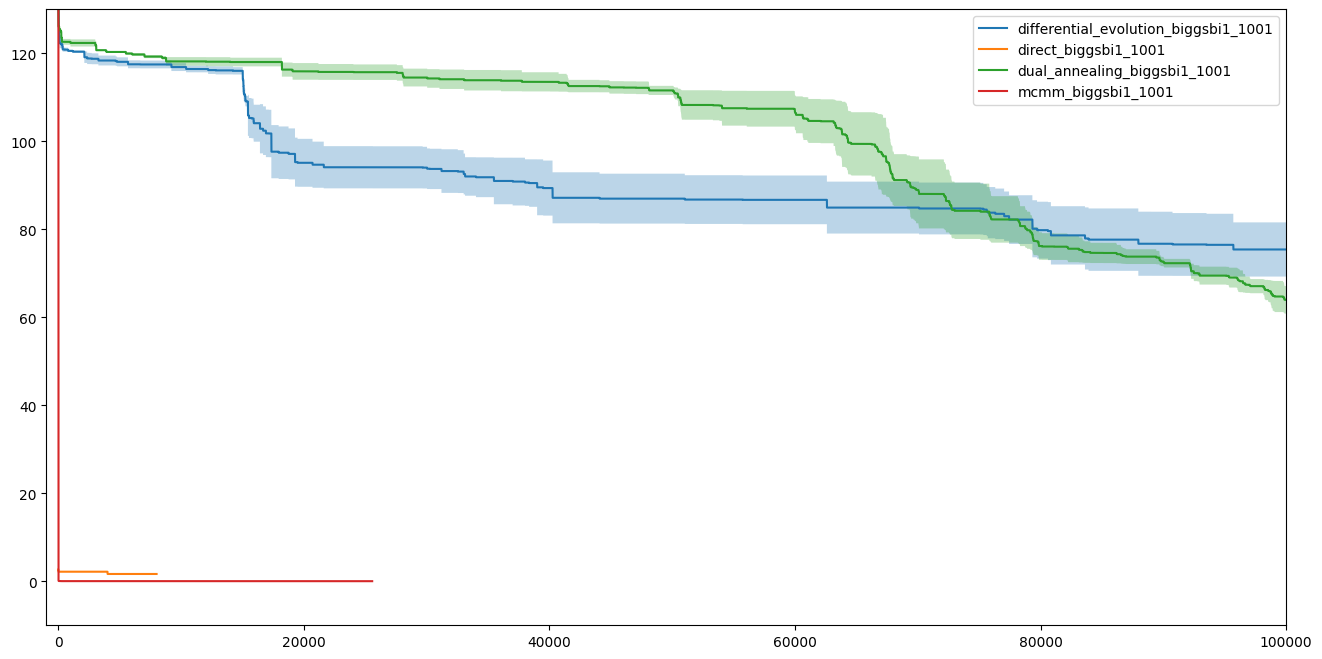

In [45]:
plot_for_func(df, "biggsbi1", xlim=[-1000, 100000], ylim=[-10,130])

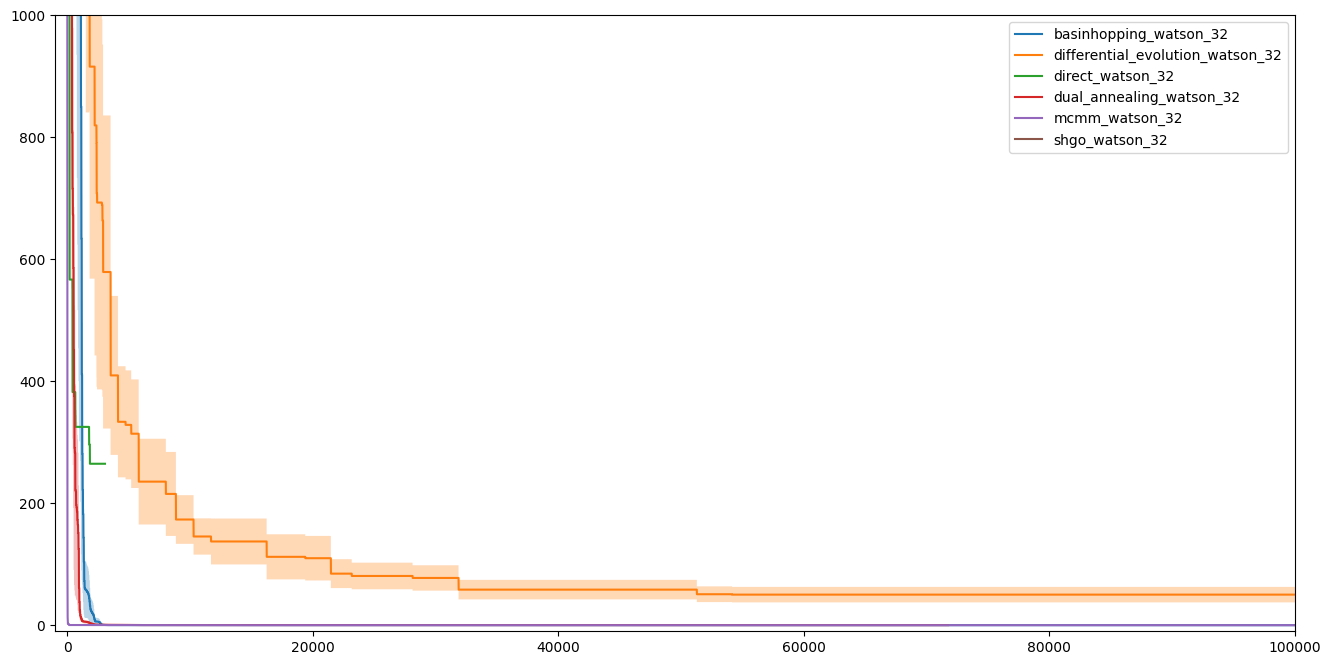

In [47]:
plot_for_func(df, "watson", xlim=[-1000, 100000], ylim=[-10, 1000])

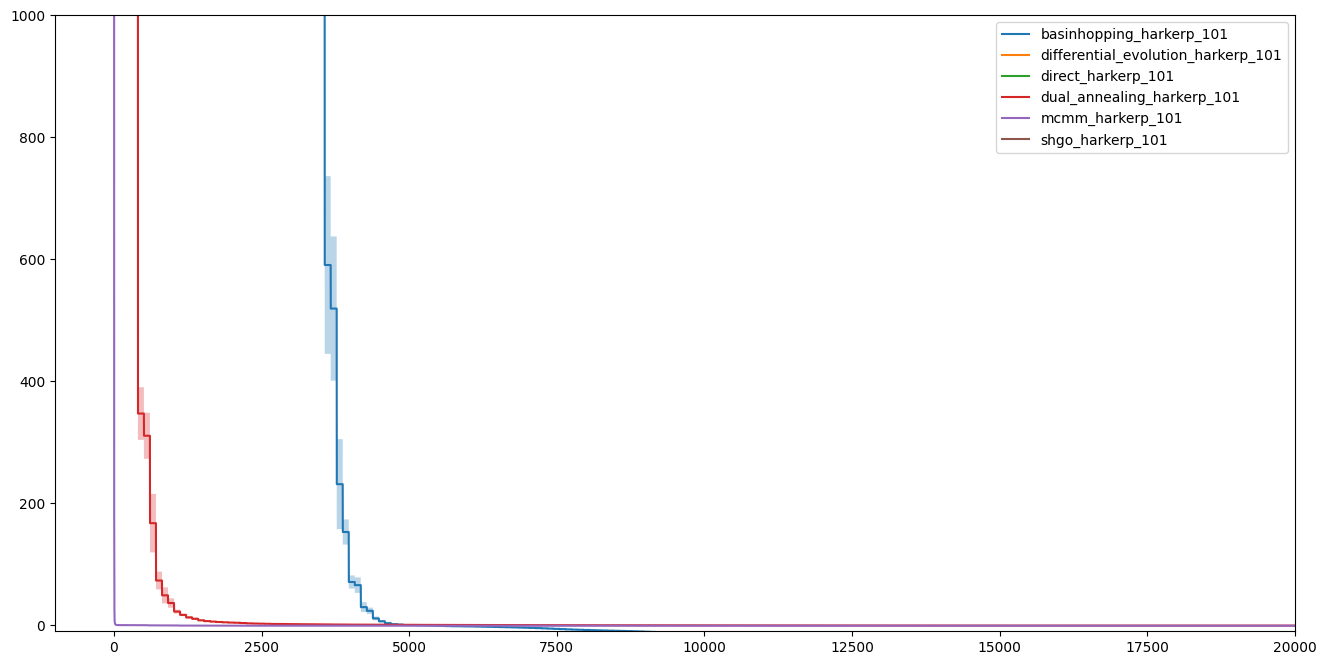

In [49]:
plot_for_func(df, "harkerp", xlim=[-1000, 20000], ylim=[-10, 1000])

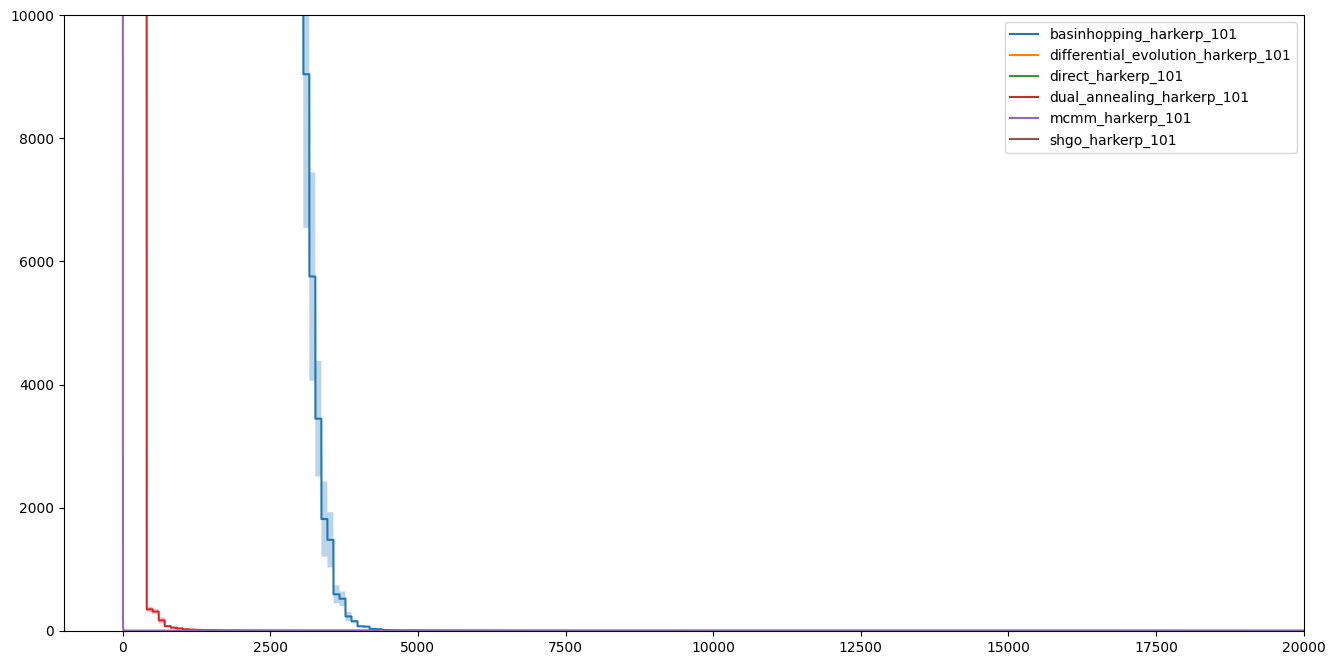

In [50]:
plot_for_func(df, "harkerp", xlim=[-1000, 20000], ylim=[-10, 10000])

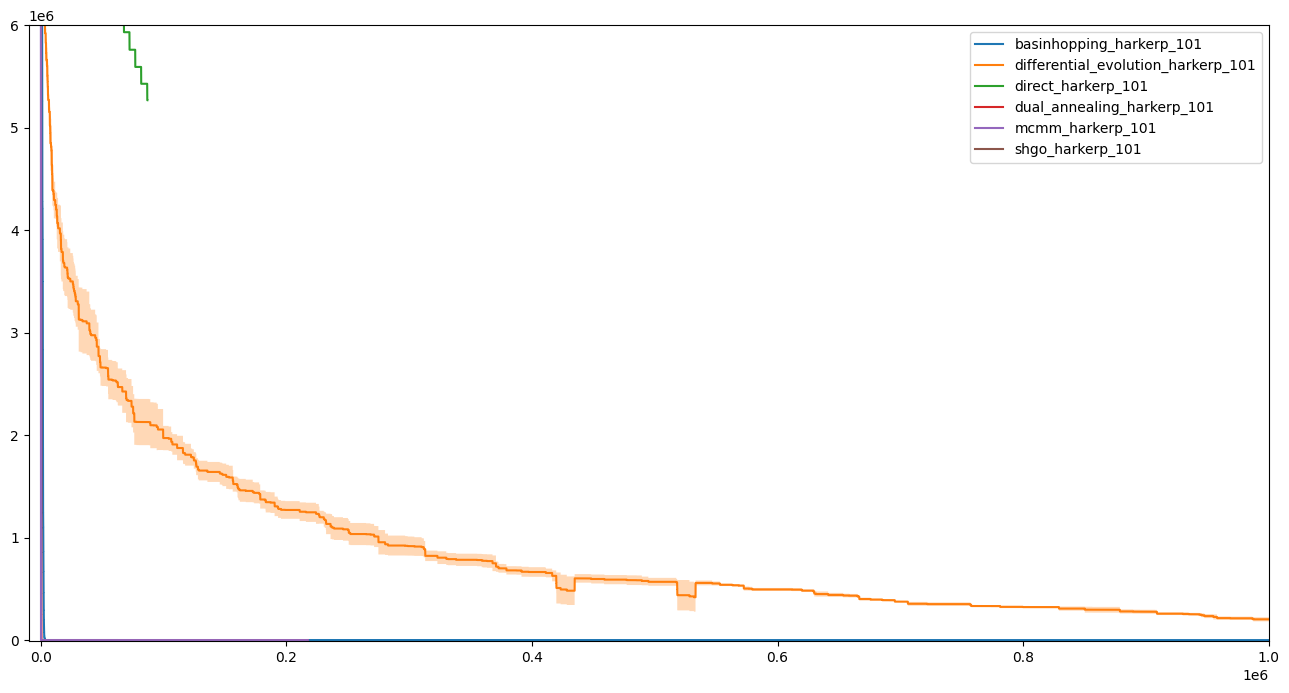

In [53]:
plot_for_func(df, "harkerp", xlim=[-10000,1000000], ylim=[-10000, 6000000])

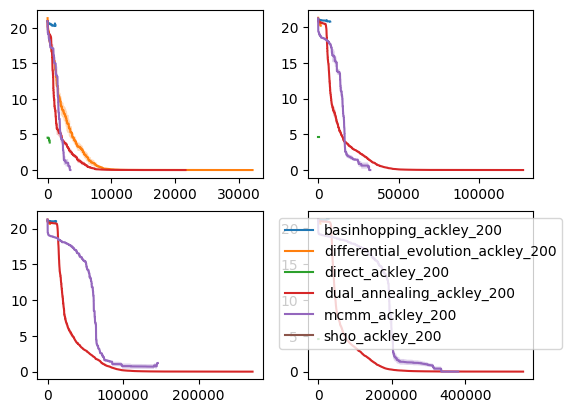

In [168]:
fig, axs = plt.subplots(2,2)
for row_idx in range(len(gathered_ackley_df)):
    df_row = gathered_ackley_df.iloc[row_idx]
    all_results = df_row['min_found_lists']
    label = "{}_{}_{}".format(df_row['algorithm'], df_row['function'], df_row['dimension'])
    pd_all_results = pd.DataFrame(all_results)
    means = pd_all_results.mean(axis = 0).to_numpy()
    err = pd_all_results.std(axis=0).fillna(0).to_numpy()
    
    if df_row['dimension'] == 10:
        ax = axs[0][0]
    elif df_row['dimension'] == 50:
        ax = axs[0][1]
    elif df_row['dimension'] == 100:
        ax = axs[1][0]
    elif df_row['dimension'] == 200:
        ax = axs[1][1]
        
    ax.plot([i for i in range(len(means))], means, label=label)
    ax.fill_between([i for i in range(len(means))], means - err / 2, means + err / 2, alpha=0.3)
    
plt.legend(loc='upper center')

10
10
10
10
10
10
50
50
50
50
50
50
100
100
100
100
100
100
200
200
200
200
200
200


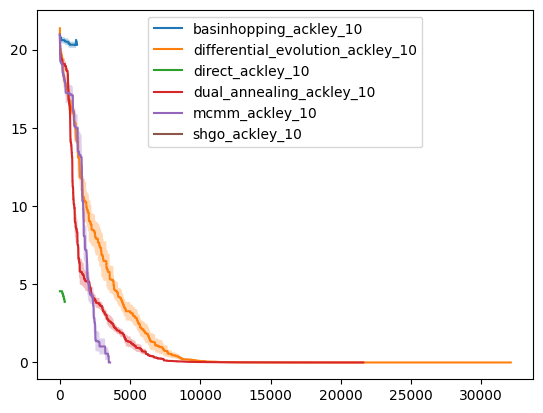

In [174]:
fig, ax = plt.subplots()
for row_idx in range(len(gathered_ackley_df)):
    df_row = gathered_ackley_df.iloc[row_idx]
    print(df_row['dimension'])
    if df_row['dimension'] != 10:
        continue
        
    
    all_results = df_row['min_found_lists']
    label = "{}_{}_{}".format(df_row['algorithm'], df_row['function'], df_row['dimension'])
    pd_all_results = pd.DataFrame(all_results)
    means = pd_all_results.mean(axis = 0).to_numpy()
    err = pd_all_results.std(axis=0).fillna(0).to_numpy()
        
    ax.plot([i for i in range(len(means))], means, label=label)
    ax.fill_between([i for i in range(len(means))], means - err / 2, means + err / 2, alpha=0.3)
    
plt.legend(loc='upper center')

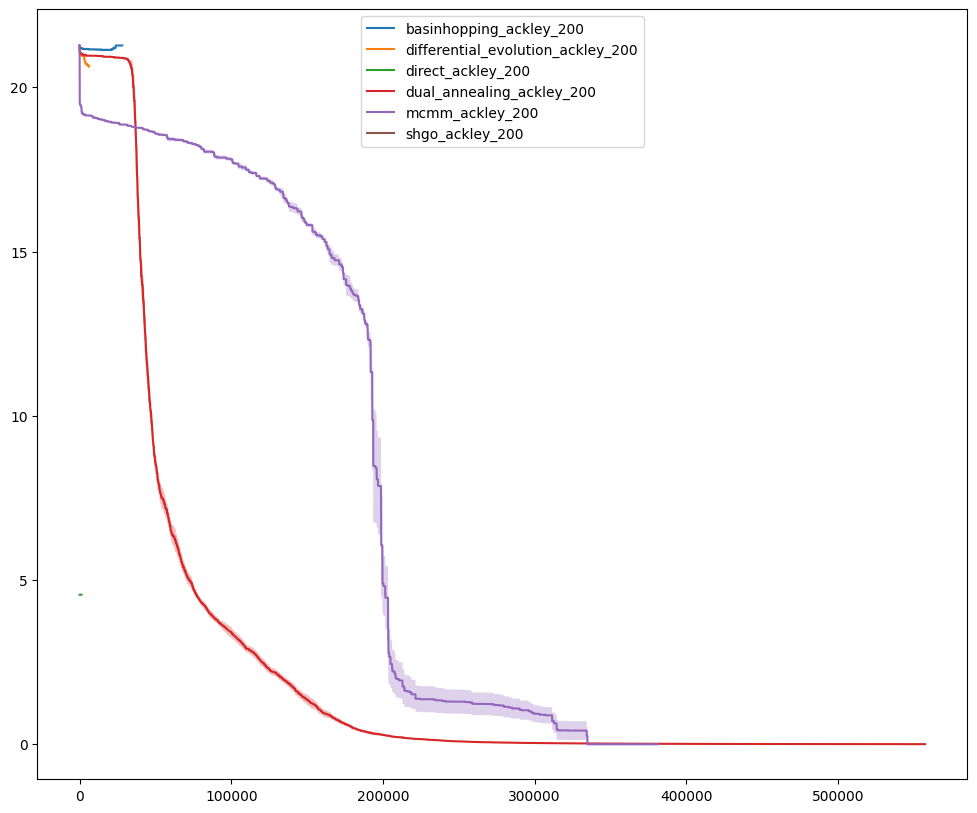

In [179]:
fig, ax = plt.subplots(figsize=(12,10))
for row_idx in range(len(gathered_ackley_df)):
    df_row = gathered_ackley_df.iloc[row_idx]
    if df_row['dimension'] != 200:
        continue
        
    
    all_results = df_row['min_found_lists']
    label = "{}_{}_{}".format(df_row['algorithm'], df_row['function'], df_row['dimension'])
    pd_all_results = pd.DataFrame(all_results)
    means = pd_all_results.mean(axis = 0).to_numpy()
    err = pd_all_results.std(axis=0).fillna(0).to_numpy()
        
    ax.plot([i for i in range(len(means))], means, label=label)
    ax.fill_between([i for i in range(len(means))], means - err / 2, means + err / 2, alpha=0.3)
    
plt.legend(loc='upper center')